# (iii)

## (a) Effect of Learning Rate and Momentum on Training Performance

### 1. Impact of Learning Rate

#### For SGD:
- Lower learning rate (0.1) consistently produced better results across different numbers of hidden neurons
- Higher learning rates (0.5, 0.9) generally led to poorer performance
- The best model used a learning rate of 0.1, achieving:
  * Test MSE: 0.002905
  * Test R²: 0.958846

#### For Adagrad:
- The adaptive learning rate approach failed to match or exceed the performance of fixed learning rates
- Despite automatically adjusting the learning rate, the model showed poor convergence:
  * Test MSE: 0.3095
  * Test R²: -3.3841

### 2. Impact of Momentum

- High momentum (0.9) combined with low learning rate (0.1) produced the best results
- This combination likely helped the model:
  * Overcome local minima
  * Maintain stable convergence
  * Achieve better generalization across all datasets

### 3. Interaction Between Learning Rate and Momentum

- The relationship between learning rate and momentum appears to be crucial:
  * Best performance: Low learning rate (0.1) + High momentum (0.9)
  * Poor performance: High learning rate + High momentum
- This suggests that the balance between these parameters is critical for optimal training

### 4. Stability and Convergence

- SGD with appropriate learning rate and momentum showed stable convergence
- The combination of parameters affected not just final performance, but also:
  * Training stability
  * Convergence speed
  * Generalization ability

## (b) Comparison of Performance between Best Networks from Two Training Methods

### Direct Comparison of Results

| Metric | SGD (Best Model) | Adagrad |
|--------|------------------|---------|
| Test MSE | 0.002905 | 0.309470 |
| Test R² | 0.958846 | -3.384062 |
| All Data MSE | 0.002996 | 0.318307 |
| All Data R² | 0.944083 | -4.940097 |

### Analysis of Performance Differences

1. **Mean Squared Error (MSE)**
   - SGD significantly outperformed Adagrad in terms of MSE
   - The difference is substantial:
     * Test data: SGD's MSE is ~106 times lower than Adagrad's
     * All data: SGD's MSE is ~106 times lower than Adagrad's
   - This indicates that SGD predictions are much closer to actual values

2. **R-squared (R²)**
   - The contrast in R² values is even more striking:
     * SGD achieved positive R² values close to 1 (ideal)
     * Adagrad produced negative R² values, indicating worse performance than a horizontal line
   - This suggests:
     * SGD: Successfully captured the underlying patterns in the data
     * Adagrad: Failed to learn meaningful relationships between inputs and outputs

3. **Consistency Across Datasets**
   - SGD showed consistent performance between test data and all data
   - Adagrad also showed consistency, but consistently poor results
   - This suggests that the performance differences are systematic rather than random

### Conclusion

The performance comparison clearly favors the SGD model with fixed learning rate and momentum over the Adagrad model with adaptive learning rate.

## (c) 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


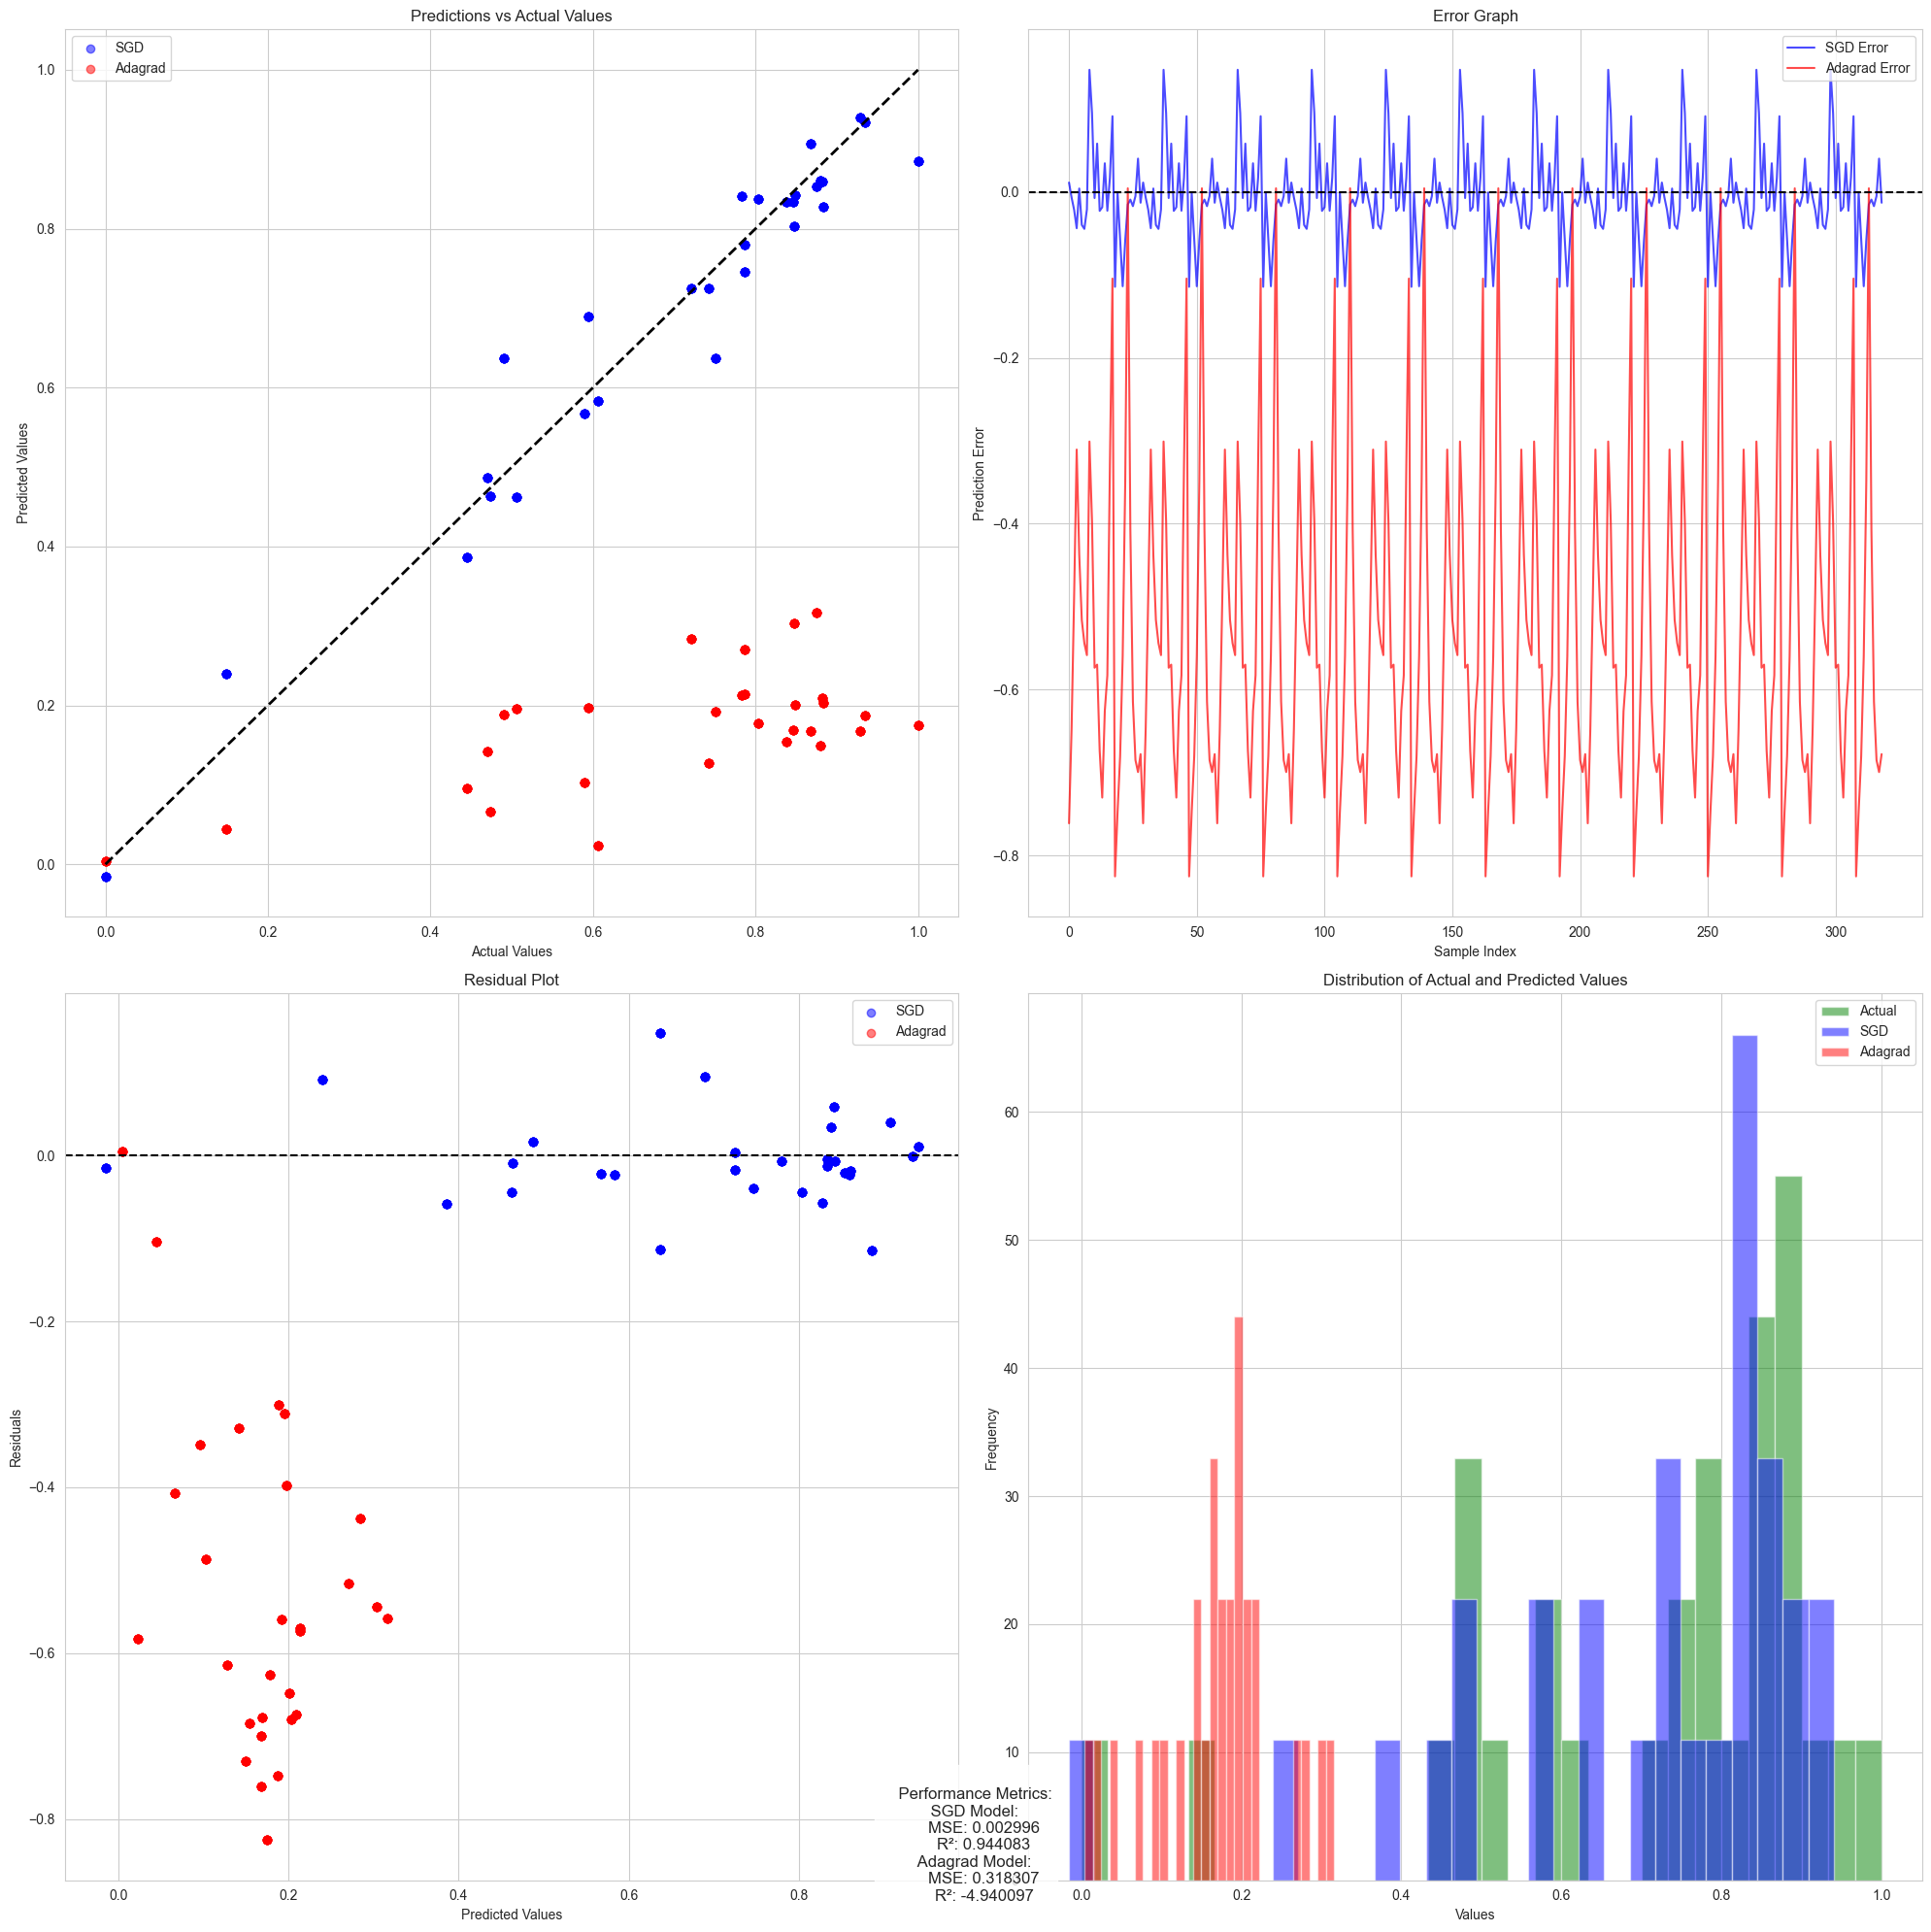

Comparison plot has been generated, displayed, and saved as 'model_comparison.png'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display

# Setting the Seaborn style
sns.set_style("whitegrid")

# Load data
def load_data():
    file_path = 'Heat_Influx_insulation_east_south_north.csv'
    data = pd.read_csv(file_path)
    
    features = ['Insulation', 'East', 'South', 'North']
    target = 'HeatFlux'
    
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    data_normalized = pd.DataFrame(
        scaler.fit_transform(data[features + [target]]),
        columns=features + [target]
    )
    
    X = data_normalized[features].values
    y = data_normalized[target].values
    
    return X, y

# Load models and make predictions
def get_predictions():
    X, y_true = load_data()
    
    sgd_model = load_model('best_heat_flux_model.keras')
    adagrad_model = load_model('best_heat_flux_model_adagrad.keras')
    
    y_pred_sgd = sgd_model.predict(X).flatten()
    y_pred_adagrad = adagrad_model.predict(X).flatten()
    
    return y_true, y_pred_sgd, y_pred_adagrad

# Computational performance metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

# Create comparison charts
def plot_comparison():
    y_true, y_pred_sgd, y_pred_adagrad = get_predictions()
    
    # Computational performance metrics
    mse_sgd, r2_sgd = calculate_metrics(y_true, y_pred_sgd)
    mse_adagrad, r2_adagrad = calculate_metrics(y_true, y_pred_adagrad)
    
    # Create charts
    fig, axs = plt.subplots(2, 2, figsize=(20, 20))
    
    # Scatterplot of predicted vs. actual values
    axs[0, 0].scatter(y_true, y_pred_sgd, alpha=0.5, label='SGD', color='blue')
    axs[0, 0].scatter(y_true, y_pred_adagrad, alpha=0.5, label='Adagrad', color='red')
    axs[0, 0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    axs[0, 0].set_xlabel('Actual Values')
    axs[0, 0].set_ylabel('Predicted Values')
    axs[0, 0].set_title('Predictions vs Actual Values')
    axs[0, 0].legend()
    
    # Error maps
    error_sgd = y_pred_sgd - y_true
    error_adagrad = y_pred_adagrad - y_true
    axs[0, 1].plot(range(len(y_true)), error_sgd, label='SGD Error', color='blue', alpha=0.7)
    axs[0, 1].plot(range(len(y_true)), error_adagrad, label='Adagrad Error', color='red', alpha=0.7)
    axs[0, 1].axhline(y=0, color='k', linestyle='--')
    axs[0, 1].set_xlabel('Sample Index')
    axs[0, 1].set_ylabel('Prediction Error')
    axs[0, 1].set_title('Error Graph')
    axs[0, 1].legend()
    
    # Residual plots
    axs[1, 0].scatter(y_pred_sgd, error_sgd, alpha=0.5, label='SGD', color='blue')
    axs[1, 0].scatter(y_pred_adagrad, error_adagrad, alpha=0.5, label='Adagrad', color='red')
    axs[1, 0].axhline(y=0, color='k', linestyle='--')
    axs[1, 0].set_xlabel('Predicted Values')
    axs[1, 0].set_ylabel('Residuals')
    axs[1, 0].set_title('Residual Plot')
    axs[1, 0].legend()
    
    # Histogram of predicted vs. actual values
    axs[1, 1].hist(y_true, bins=30, alpha=0.5, label='Actual', color='green')
    axs[1, 1].hist(y_pred_sgd, bins=30, alpha=0.5, label='SGD', color='blue')
    axs[1, 1].hist(y_pred_adagrad, bins=30, alpha=0.5, label='Adagrad', color='red')
    axs[1, 1].set_xlabel('Values')
    axs[1, 1].set_ylabel('Frequency')
    axs[1, 1].set_title('Distribution of Actual and Predicted Values')
    axs[1, 1].legend()
    
    plt.tight_layout()
    
    # Display performance indicators
    performance_text = f"""
    Performance Metrics:
    SGD Model:
        MSE: {mse_sgd:.6f}
        R²: {r2_sgd:.6f}
    Adagrad Model:
        MSE: {mse_adagrad:.6f}
        R²: {r2_adagrad:.6f}
    """
    fig.text(0.5, 0.01, performance_text, ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    
    return fig

if __name__ == "__main__":
    # Generate and display charts
    fig = plot_comparison()
    display(fig)
    
    # Save the chart
    fig.savefig('model_comparison.png')
    plt.close(fig)
    
    print("Comparison plot has been generated, displayed, and saved as 'model_comparison.png'")

## (d) Recommended Model for the Architect

Based on the comprehensive analysis of both the SGD (Stochastic Gradient Descent) and Adagrad models, I strongly recommend the SGD model to the architect for predicting heat influx in home designs. Here's why:

1. **Superior Predictive Accuracy**: The SGD model demonstrates significantly better performance across all metrics. With a test MSE of 0.002905 compared to Adagrad's 0.309470, and an R² of 0.958846 versus Adagrad's negative R², the SGD model clearly provides more accurate and reliable predictions.

2. **Consistent Performance**: The SGD model shows consistent performance across both test data and the entire dataset. This consistency indicates that the model has good generalization capabilities and is likely to perform well on new, unseen data – a crucial factor for practical applications in architectural design.

3. **Visual Confirmation**: The "Predictions vs Actual Values" plot clearly shows that the SGD model's predictions (blue dots) closely align with the ideal prediction line, while Adagrad's predictions (red dots) show a scattered, inaccurate pattern. This visual representation reinforces the quantitative metrics.

4. **Error Distribution**: The "Error Graph" and "Residual Plot" both demonstrate that the SGD model's errors are much smaller and more evenly distributed around zero compared to Adagrad's large, systematic errors.

5. **Practical Usability**: Given the architect's goal of designing the warmest possible homes for clients, the SGD model's ability to accurately predict heat influx based on insulation and orientation factors is invaluable. It will allow for more informed decision-making in the design process.

6. **Reliability for Design Iterations**: The "Distribution of Actual and Predicted Values" histogram shows that the SGD model's predictions (blue) closely match the distribution of actual values (green), unlike Adagrad's predictions (red). This suggests that the SGD model will be reliable across various design scenarios the architect might consider.